In [1]:
include("simu_utils.jl")
gr()    # the default backend has bad quiver plot, and pyplot has the plot duplication bug
using Distributions    # to draw from uniform
using JLD2    # for data sl

KD/KS = 0.38304762142904825; KS = 2.3598212121066933; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0

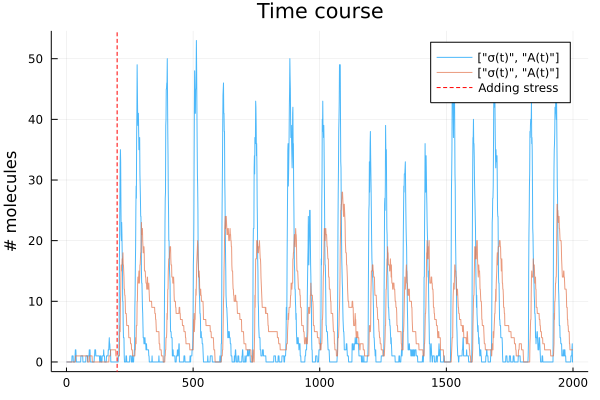

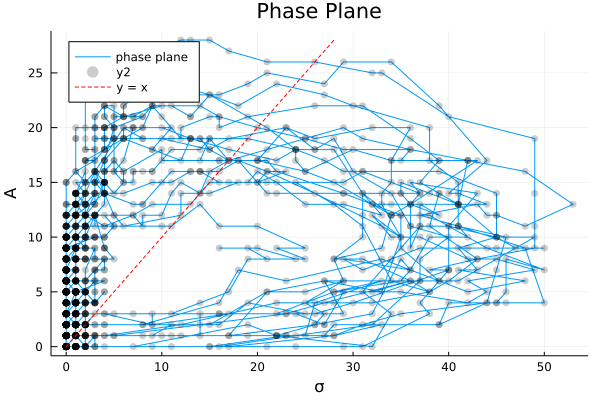

# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: false, has forward flow: true


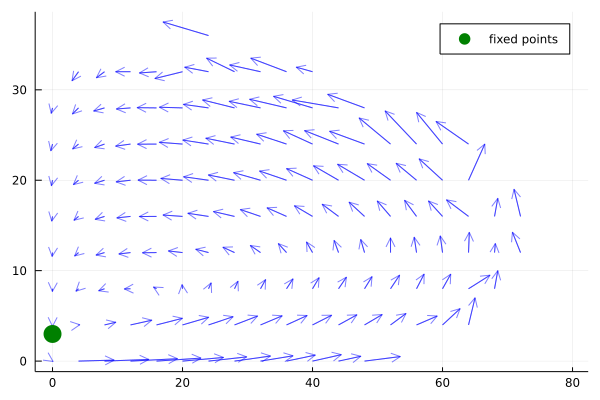

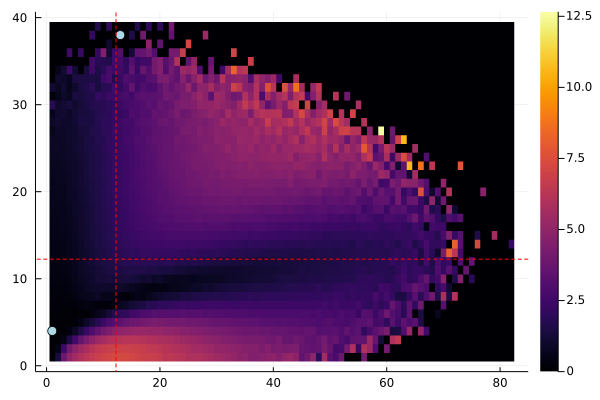

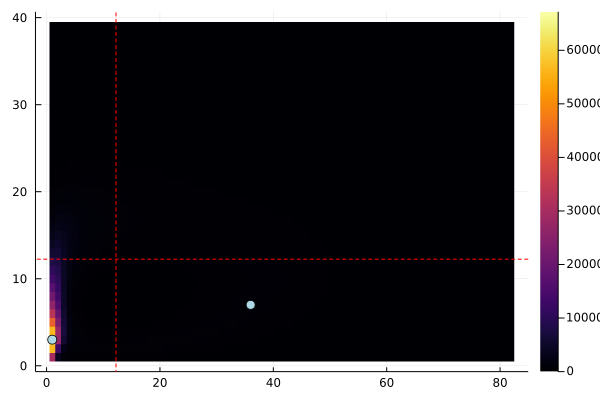

The dynamical behaviour is: stochastic_pulsing


:stochastic_pulsing

In [2]:
# parameters for the simulation
timescale = 5.0
timespan = 1e7    # extremely long
stress_t = 200.0
dt = 1.0
rτ = 5.0
β = 50.0
n = 3.0

# model
sigma_model = reaction_system()

# parameters to inspect
KS = exp(rand(Uniform(-5.0, 5.0)))
rK = exp(rand(Uniform(-5.0, 5.0)))
KS = 2.3598212121066933
rK = 0.38304762142904825

# simulation
# there was a bug in julia 1.5 that the jump process simulation
# freezes when the timespan is long (1e6 to 1e7 iters)
sol = simu_all(
    sigma_model, 
    _KS = KS, 
    _rK = rK,
    _β = β, 
    _τ₁ = timescale, 
    _rτ = rτ, 
    _n = n,
    method = "ssa",
    show_hill = false,
    max_t = timespan,
    saveat = dt)

# classfication
regime = classify_by_timetraj(
    sol, stress_t, dt, β, n, 
    thres_v = 0.003, thres_d = 1e-4, fluc_mult = 3, 
    show_vf_plot = true, show_v_heatmap = true, show_p_heatmap = true, quiet = false)


## example julia data save and load by JLD2

In [ ]:
# parameters for the simulation
timescale = 5.0
timespan = 2e6
stress_t = 200.0
dt = 1.0
rτ = 5.0
β = 50.0
n = 3.0
df_name = "SD_ssa_n3_b50_rt5_lts"

# model
sigma_model = reaction_system()

# parameters to inspect
KS = exp.(range(-5.0, stop = 5.0, length = 100))
rK = exp.(range(-5.0, stop = 5.0, length = 100))

# initialize
behaviors = Array{Symbol, 2}(undef, length(rK), length(KS))

for i = 51:length(rK)
    for j = 1:length(KS)
        quiet = true    # control (decrease) the output
        no = (i - 1) * length(KS) + j
        if mod(no, 10) == 1
            println("# ", no)
            quiet = false
        end
        
        # simulation
        # there was a bug in julia 1.5 that the jump process simulation
        # freezes when the timespan is long (1e6 to 1e7 iters)
        sol = simu_all(
            sigma_model, 
            _KS = KS[j], 
            _rK = rK[i],
            _β = β, 
            _τ₁ = timescale, 
            _rτ = rτ, 
            _n = n,
            method = "ssa",
            show_hill = false,
            show_tc = false,
            show_pp = false,
            max_t = timespan,
            saveat = dt,
            quiet = quiet)
        
        # classification
        regime = classify_by_timetraj(
            sol, stress_t, dt, β, n, 
            thres_v = 0.003, thres_d = 1e-4, fluc_mult = 3,
            quiet = quiet)
        
        behaviors[i, j] = regime
        
        # save data every 1000 iters
        if mod(no, 1000) == 0
            save(df_name * ".jld2", Dict("behaviors" => behaviors))
            println("### behaviors saved to file after ", no, " iters ###")
        end
    end
end

# 5001
KD/KS = 1.0518021754737883; KS = 0.006737946999085467; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 0, # fp below noise level: 0, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: oscillation
# 5011
KD/KS = 1.0518021754737883; KS = 0.01850158287219099; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 0, # fp below noise level: 0, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: oscillation
# 5021
KD/KS = 1.0518021754737883; KS = 0.050803096080009554; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 0, # fp below noise level: 0, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: oscillation
# 5031
KD/KS = 1.0518021754737883; KS = 0.13949912227207403; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 0, # fp below noise level: 0, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: oscillation
# 5041
KD/KS = 1.0518021754737883;

# 5341
KD/KS = 1.4240933327953988; KS = 0.38304762142904825; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 0, # fp above noise level: 1, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_anti_pulsing
# 5351
KD/KS = 1.4240933327953988; KS = 1.0518021754737883; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 0, # fp above noise level: 1, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_anti_pulsing
# 5361
KD/KS = 1.4240933327953988; KS = 2.888120835221818; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 0, # fp above noise level: 1, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_anti_pulsing
# 5371
KD/KS = 1.4240933327953988; KS = 7.930428509605456; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsin

# 5671
KD/KS = 1.928158990162544; KS = 7.930428509605456; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 2, # fp below noise level: 1, # fp above noise level: 1, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_switching
# 5681
KD/KS = 1.928158990162544; KS = 21.775992049561435; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: false, has forward flow: false
The dynamical behaviour is: no_expression
# 5691
KD/KS = 1.928158990162544; KS = 59.79422538999145; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: false, has forward flow: false
The dynamical behaviour is: no_expression
# 5701
KD/KS = 2.1330987987666656; KS = 0.006737946999085467; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 0, # fp above noise level: 1, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_anti_pulsing
# 5711
KD/KS =

### behaviors saved to file after 6000 iters ###
# 6001
KD/KS = 2.888120835221818; KS = 0.006737946999085467; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 0, # fp above noise level: 1, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_anti_pulsing
# 6011
KD/KS = 2.888120835221818; KS = 0.01850158287219099; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 0, # fp above noise level: 1, has reverse flow: true, has forward flow: false
The dynamical behaviour is: homo_activation
# 6021
KD/KS = 2.888120835221818; KS = 0.050803096080009554; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 0, # fp above noise level: 1, has reverse flow: true, has forward flow: false
The dynamical behaviour is: homo_activation
# 6031
KD/KS = 2.888120835221818; KS = 0.13949912227207403; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 0, # fp above noise level: 1, has reverse flow: true, has forward flow: true
The dyn

KD/KS = 3.9103870686464153; KS = 0.13949912227207403; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 0, # fp above noise level: 1, has reverse flow: false, has forward flow: false
The dynamical behaviour is: homo_activation
# 6341
KD/KS = 3.9103870686464153; KS = 0.38304762142904825; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 0, # fp above noise level: 1, has reverse flow: false, has forward flow: false
The dynamical behaviour is: homo_activation
# 6351
KD/KS = 3.9103870686464153; KS = 1.0518021754737883; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 0, # fp above noise level: 1, has reverse flow: false, has forward flow: false
The dynamical behaviour is: homo_activation
# 6361
KD/KS = 3.9103870686464153; KS = 2.888120835221818; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 0, # fp above noise level: 1, has reverse flow: false, has forward flow: false
The dynamical behaviour is: homo_activation
# 6371
KD/KS = 3.91038

# 6671
KD/KS = 5.29449005047003; KS = 7.930428509605456; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 0, # fp above noise level: 1, has reverse flow: false, has forward flow: false
The dynamical behaviour is: homo_activation
# 6681
KD/KS = 5.29449005047003; KS = 21.775992049561435; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: false, has forward flow: false
The dynamical behaviour is: no_expression
# 6691
KD/KS = 5.29449005047003; KS = 59.79422538999145; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: false, has forward flow: false
The dynamical behaviour is: no_expression
# 6701
KD/KS = 5.857229836522779; KS = 0.006737946999085467; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 0, # fp above noise level: 1, has reverse flow: false, has forward flow: false
The dynamical behaviour is: homo_activation
# 6711
KD/KS = 5.8572298365

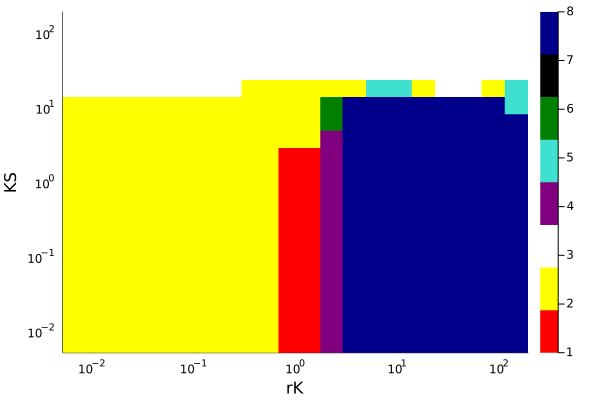

In [5]:
num_behaviors = zeros(Int64, size(behaviors)...)

sym2num = Dict(:oscillation => 1, :stochastic_pulsing => 2, :no_expression => 3,
    :stochastic_anti_pulsing => 4, :het_activation => 5, :stochastic_switching => 6,
    :undefined=> 7, :homo_activation => 8)
color_grad = cgrad([:red, :yellow, :white, :purple, :turquoise, :green, :black, :darkblue], categorical = true)

for i = 1:size(behaviors, 1)
    for j = 1:size(behaviors, 2)
        num_behaviors[i, j] = sym2num[behaviors[i, j]]
    end
end

heatmap(rK, KS, num_behaviors', c = color_grad, xaxis = :log, yaxis = :log,
    xlabel = "rK", ylabel = "KS")